# Clustering of Quasars

### The purpose of this notebook is to determine the difference between clustering patterns of obscured and unobscured quasars

In [104]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import weightedstats as ws
from sigma_m import sigma_m
%matplotlib inline

## Step 1: Obtain a simulated distribution of dark matter halos

### 11 < $log_{10}M_{\odot}$ < 15, Tinker et al 2010

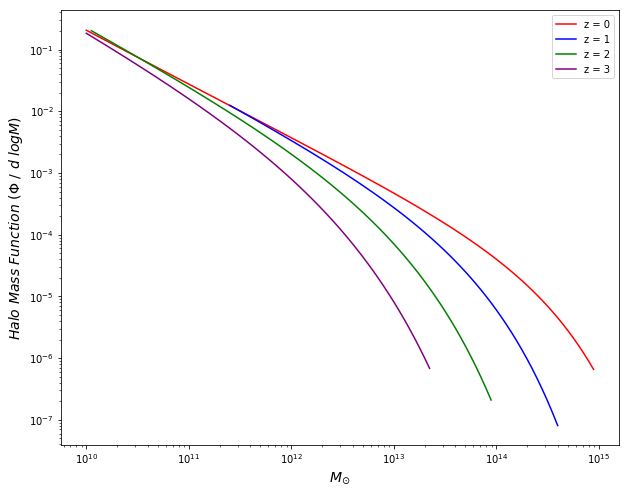

In [2]:
m = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz0.txt', skiprows = 4, usecols = 0)

HMFZ0 = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz0.txt', skiprows = 4, usecols = 6)
HMFZ1 = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz1.txt', skiprows = 4, usecols = 6)
HMFZ2 = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz2.txt', skiprows = 4, usecols = 6)
HMFZ3 = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz3.txt', skiprows = 4, usecols = 6)

plt.figure(figsize = (10,8))
plt.loglog(m, HMFZ0, label = 'z = 0', c='red')
plt.loglog(m, HMFZ1, label = 'z = 1', c = 'blue')
plt.loglog(m, HMFZ2, label = 'z = 2', c = 'green')
plt.loglog(m, HMFZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$M_{\odot}$', fontsize = 14)
plt.ylabel('$Halo\ Mass\ Function \ (\Phi \ / \ d\ logM)$', fontsize = 14)
plt.legend()


HMFcalcZ0 = HMFZ0

## Step 2: Convert the HMF to galaxy mass distributions using the equation, $\frac{M_{*}}{M_{halo}} = c [(\frac{M_{halo}}{M_{\odot}})^{- \alpha} +(\frac{M_{halo}}{M_{\odot}})^{\beta}]^{- \gamma}$                          from Guo et al 2010 (for z  = 1).

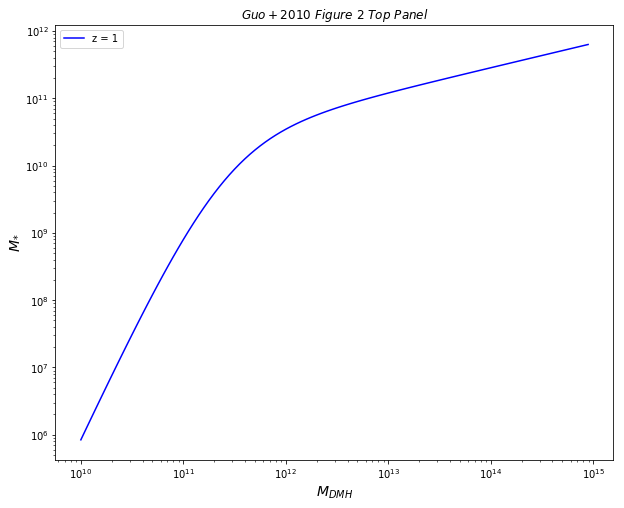

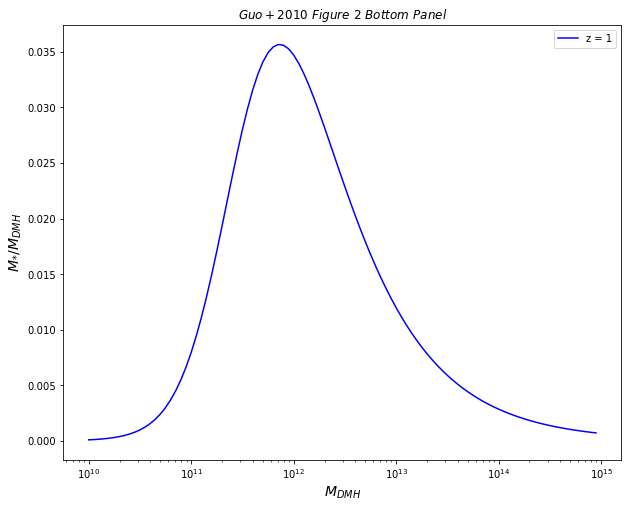

In [3]:
c = 0.129
M0 = 10.**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440
#mZ1 = np.logspace(10, 16, 1000)


smZ0 = c*((m/M0)**(-1*alpha) + (m/M0)**(beta))**(-1*gamma)
smZ1 = c*((m/M0)**(-1*alpha) + (m/M0)**(beta))**(-1*gamma)
smZ2 = c*((m/M0)**(-1*alpha) + (m/M0)**(beta))**(-1*gamma)
smZ3 = c*((m/M0)**(-1*alpha) + (m/M0)**(beta))**(-1*gamma)

toppanel = smZ1*m

plt.figure(figsize = (10,8))
plt.loglog(m, toppanel, label = 'z = 1', c='blue')
plt.xlabel('$M_{DMH}$', fontsize = 14)
plt.ylabel('$M_{*}$', fontsize = 14)
plt.title('$Guo+2010 \ Figure \ 2 \ Top \ Panel$')
plt.legend()

plt.figure(figsize = (10,8))
#plt.loglog(mZ0, smZ0, label = 'z = 0', c='red')
plt.semilogx(m, smZ1, label = 'z = 1', c = 'blue')
#plt.loglog(mZ2, smZ2, label = 'z = 2', c = 'green')
#plt.loglog(mZ3, smZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$M_{DMH}$', fontsize = 14)
plt.ylabel('$M_{*} / M_{DMH}$', fontsize = 14)
plt.title('$Guo+2010 \ Figure \ 2 \ Bottom \ Panel$')
plt.legend()


smZ1 = c*((m/M0)**(-1*alpha) + (m/M0)**(beta))**(-1*gamma)

stellarmZ0 = smZ0*m
stellarmZ1 = smZ1*m
stellarmZ2 = smZ2*m
stellarmZ3 = smZ3*m


logMstellar = np.log10(stellarmZ0)
logMh = np.log10(stellarmZ0/smZ0)

convert = logMh/logMstellar
#convert = stellarmZ0/m

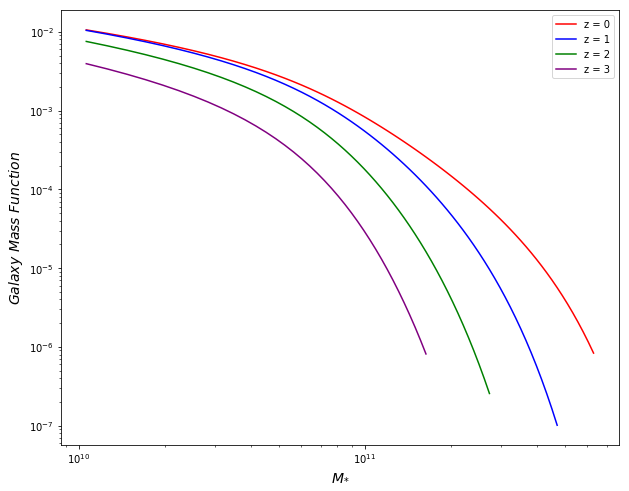

In [4]:
# converting Halo Mass Function to Galaxy Mass Function
smfZ0 = HMFZ0 * convert
smfZ1 = HMFZ1 * convert
smfZ2 = HMFZ2 * convert
smfZ3 = HMFZ3 * convert

mflag = stellarmZ0 > 1.e10

plt.figure(figsize = (10,8))
plt.loglog(stellarmZ0[mflag], smfZ0[mflag], label = 'z = 0', c='red')
plt.loglog(stellarmZ1[mflag], smfZ1[mflag], label = 'z = 1', c = 'blue')
plt.loglog(stellarmZ2[mflag], smfZ2[mflag], label = 'z = 2', c = 'green')
plt.loglog(stellarmZ3[mflag], smfZ3[mflag], label = 'z = 3', c = 'purple')
plt.xlabel('$M_{*}$', fontsize = 14)
plt.ylabel('$Galaxy\ Mass\ Function$', fontsize = 14)
plt.legend()

HMFcalcstellarmZ1 = stellarmZ1
HMFcalcsmfZ1 = smfZ1

## Step 3: Converting from galaxy mass to black hole mass using log(Mbh/M⊙) = (8.20 ± 0.10) + (1.12 ± 0.06) log(Mbulge/1011M⊙) from Haring and Rix 2004.

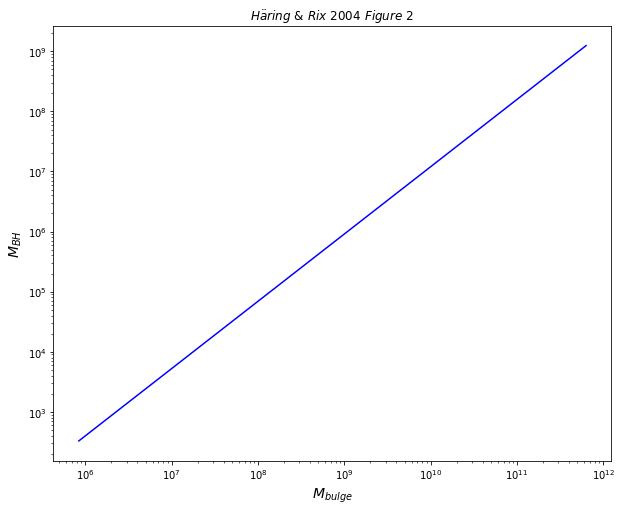

In [5]:
bhm = 10**(8.20 + 1.12*np.log10(stellarmZ1/1.e11))

plt.figure(figsize = (10,8))
plt.loglog(stellarmZ1, bhm, color = 'blue', label = 'z = 1')
plt.xlabel('$M_{bulge}$', fontsize = 14)
plt.ylabel('$M_{BH}$', fontsize = 14)
plt.title('$H \ddot{a} ring \ & \ Rix \ 2004 \ Figure \ 2$')

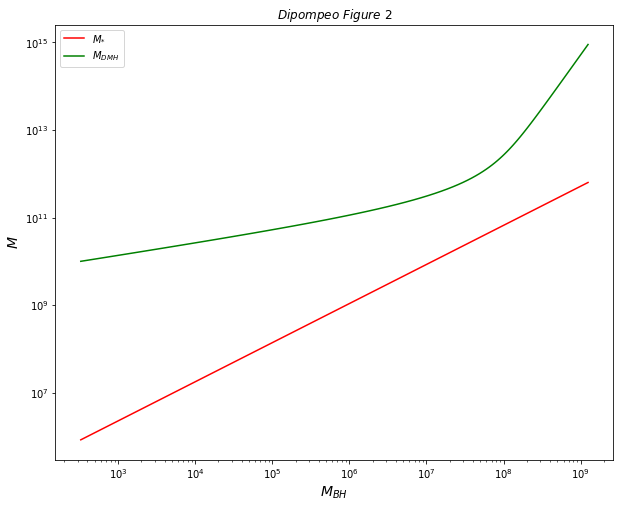

In [6]:
plt.figure(figsize = (10,8))
plt.loglog(bhm, stellarmZ1, '-r', label = '$M_{*}$')
plt.loglog(bhm, m, '-g', label = '$M_{DMH}$')
plt.title('$Dipompeo \ Figure \ 2$')
plt.xlabel('$M_{BH}$', fontsize = 14)
plt.ylabel('$M$', fontsize = 14)
plt.legend()

### Converting Galaxy Mass Function to Black Hole Mass Function

In [7]:
logMbh = 8.2 + 1.12*(np.log10(stellarmZ1) - 11)
logMstellar = ((logMbh - 8.2)/1.12) + 11

startobh = logMstellar/logMbh

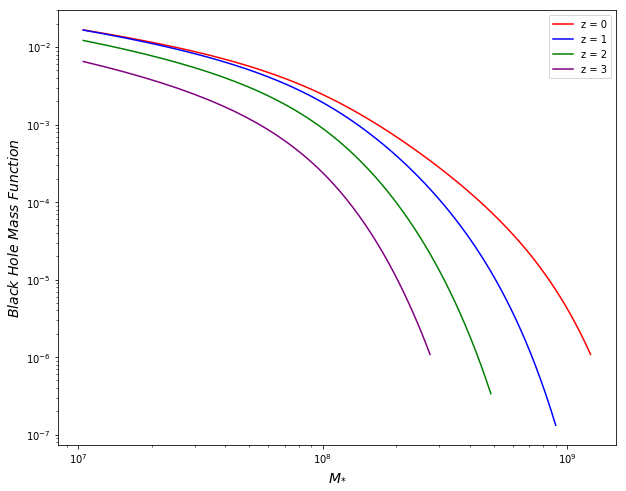

In [8]:
bhmfZ0 = smfZ0 * startobh
bhmfZ1 = smfZ1 * startobh
bhmfZ2 = smfZ2 * startobh
bhmfZ3 = smfZ3 * startobh

mbhflag = bhm > 1.e7

plt.figure(figsize = (10,8))
plt.loglog(bhm[mbhflag], bhmfZ0[mbhflag], label = 'z = 0', c='red')
plt.loglog(bhm[mbhflag], bhmfZ1[mbhflag], label = 'z = 1', c = 'blue')
plt.loglog(bhm[mbhflag], bhmfZ2[mbhflag], label = 'z = 2', c = 'green')
plt.loglog(bhm[mbhflag], bhmfZ3[mbhflag], label = 'z = 3', c = 'purple')
plt.xlabel('$M_{*}$', fontsize = 14)
plt.ylabel('$Black \ Hole \ Mass\ Function$', fontsize = 14)
plt.legend()

HMFcalcbhmZ1 = bhm
HMFcalcbhmfZ1 = bhmfZ1

## Convert to a Black Hole Eddington Luminosity Function in units of $L_{\odot}$

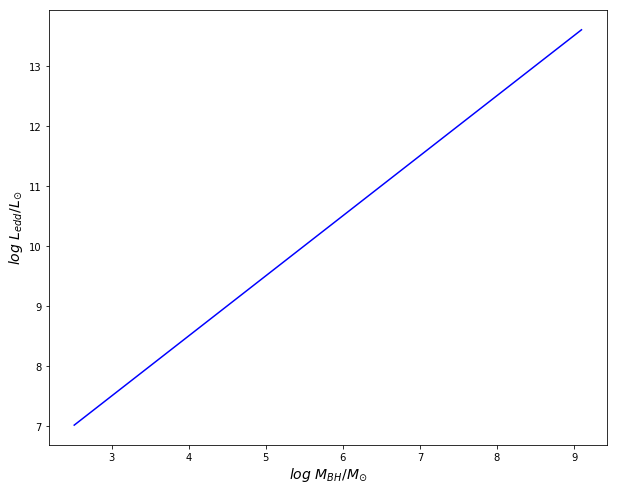

In [9]:
log_bhm = logMbh
Mbh = 10**logMbh

Ledd = 3.2e4 * Mbh
logLedd = np.log10(Ledd)

bhmtoledd = logLedd/log_bhm

plt.figure(figsize= (10,8))
plt.plot(log_bhm, logLedd, 'b')
plt.xlabel('$log \\ M_{BH}/M_{\odot}$', fontsize = 14)
plt.ylabel('$log \\ L_{edd}/L_{\odot}$', fontsize = 14)

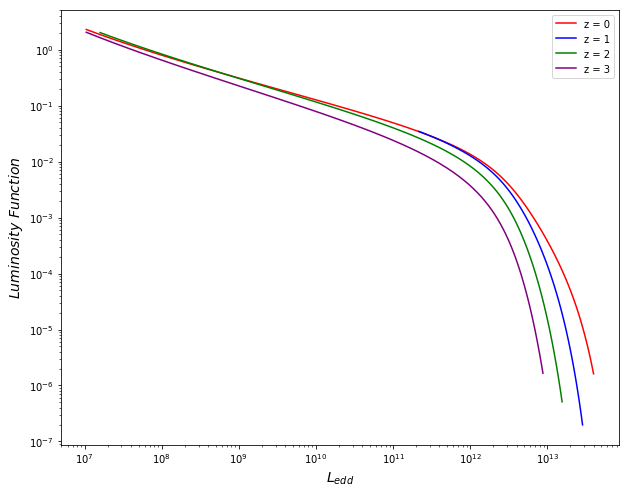

In [10]:
LumFZ0 = bhmfZ0 * bhmtoledd
LumFZ1 = bhmfZ1 * bhmtoledd
LumFZ2 = bhmfZ2 * bhmtoledd
LumFZ3 = bhmfZ3 * bhmtoledd

plt.figure(figsize = (10,8))
plt.loglog(Ledd, LumFZ0, label = 'z = 0', c='red')
plt.loglog(Ledd, LumFZ1, label = 'z = 1', c = 'blue')
plt.loglog(Ledd, LumFZ2, label = 'z = 2', c = 'green')
plt.loglog(Ledd, LumFZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$L_{edd}$', fontsize = 14)
plt.ylabel('$Luminosity \ Function$', fontsize = 14)
axes = plt.gca()
#axes.set_ylim([1e-28, 1e-16])
plt.legend()

HMFcalcLZ1 = Ledd
HMFcalcLFZ1 = LumFZ1

# Trying to create a sample set for myself (as done in Dipompeo+2016)- Starting with Black Hole Masses and then going back to DMH Masses) 
$\\ f(\nu) = \alpha [1 + 
(\beta \nu)^{-2 \phi}] \nu ^{2 \eta} e^{- \gamma \nu^{2}/2} \\
\beta = \beta _{0} (1+z)^{0.20} \\
\phi = \phi _{0} (1+z)^{-0.08} \\
\eta = \eta _{0} (1+z)^{0.27} \\
\gamma = \gamma _{0} (1+z)^{-0.01}$

## Converted Mike's IDL code to python as seen below

#### Generate a Power Spectrum using CAMB Practice

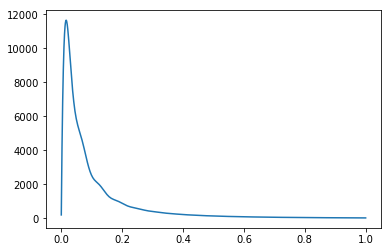

In [11]:
import sys, platform, os

sys.path.insert(0, '/Users/kellywhalen/Downloads/CAMB-0.1.6.1/pycamb')
import camb
from camb import model, initialpower

#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=70.2, ombh2=0.022, omch2=0.122)
pars.set_dark_energy() #re-set defaults
pars.InitPower.set_params(ns=0.965, As = 2.46e-9)
#Not non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[1], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

plt.figure()
plt.plot(kh, pk[0])

### Integration routine from stack exchange

In [12]:
def idl_tabulate(x, f, p=5) :
    import scipy
    def newton_cotes(x, f) :
        if x.shape[0] < 2 :
            return 0
        rn = (x.shape[0] - 1) * (x - x[0]) / (x[-1] - x[0])
        weights = scipy.integrate.newton_cotes(rn)[0]
        return (x[-1] - x[0]) / (x.shape[0] - 1) * np.dot(weights, f)
    ret = 0
    for idx in xrange(0, x.shape[0], p - 1) :
        ret += newton_cotes(x[idx:idx + p], f[idx:idx + p])
    return ret

### Recreating Mike's sigma_m.pro code

In [13]:
def sigma_m(mhalo, z):
    
    import sys, platform, os
    import camb
    from camb import model, initialpower
    
    #Setting up a few parameters
    h0 = 0.702
    omega_m = 0.275
    omega_l = 0.725
    omega_b = 0.046
    omega_bh2 = omega_b*h0**2
    omega_ch2 = (omega_m - omega_b)*(h0**2.)
    spec_index = ns=0.96
    rho_crit=2.7745e11
    rho_mean=rho_crit*omega_m
    
    

    #Get power spectrum using CAMB
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=h0*100., ombh2=omega_bh2, omch2=omega_ch2)
    pars.set_dark_energy() #re-set defaults
    pars.InitPower.set_params(ns=spec_index, As = 2.46e-9)
    
    
    #Not non-linear corrections couples to smaller scales than you want
    pars.set_matter_power(redshifts= [z], kmax=10.0)
    
   #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    wavenum, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=50, npoints = 200)

    pk = pk[0]
    Rf=((3./4.)*(mhalo/(np.pi*rho_mean)))**(1./3)
    sigm = np.zeros(len(mhalo))
 
    for i in range(len(mhalo)):
        WHat=(3./((wavenum*Rf[i])**3.))*(np.sin(wavenum*Rf[i])-((wavenum*Rf[i])*np.cos(wavenum*Rf[i])))
        integ=pk*(WHat**2.)*(wavenum**2.)
        res = np.trapz(integ, wavenum)
        sigm[i] = ((1./(2.*(np.pi**2.)))*res)**(1./2.)
    
    #plt.figure()
    #plt.loglog(wavenum, pk)
    return sigm #, pk, wavenum

### Recreating Mike's Halo Mass code

In [14]:
def halo_mass_function(mhalo, z):
    import numpy as np
    from scipy.interpolate import interp1d
    delta = 200.
    
    h0 = 0.702
    omega_m = 0.275
    omega_l = 0.725
    omega_b = 0.046
    omega_bh2 = omega_b*h0**2
    omega_ch2 = (omega_m - omega_b)*(h0**2.)
    spec_index = ns=0.96
    rho_crit=2.7745e11
    rho_mean=rho_crit*omega_m
    
    # Set Hubble parameter scaling E(z)
    E_z = np.sqrt((omega_m*(1. + z)**3) + omega_l)
    
    # Scale omega_m, omega_l with z
    omega_m_z=omega_m*((1.+z)**3.)/(E_z**2.)
    
    # Get sigma_m
    sig_m = sigma_m(mhalo, z)
    
    # Use approximation of NFW 97 for delta (valid in universe with Lambda, while Tinker delta_c=1.69 only for 
    # Omega_m=1), 
    delta_c = 0.15*((12*np.pi)**(2./3.))*((omega_m_z)**(0.0055))
    nu = delta_c/sig_m
    
    # Tinker 2010 model
    Deltas=[200.,300.,400.,600.,800.,1200.,1600.,2400.,3200.]
    alphas=[0.368,0.363,0.385,0.389,0.393,0.365,0.379,0.355,0.327]
    betas=[0.589,0.585,0.544,0.543,0.564,0.623,0.637,0.673,0.702]
    gams=[0.864,0.922,0.987,1.09,1.20,1.34,1.50,1.68,1.81]
    phis=[-0.729,-0.789,-0.910,-1.05,-1.20,-1.26,-1.45,-1.50,-1.49]
    etas=[-0.243,-0.261,-0.261,-0.273,-0.278,-0.301,-0.301,-0.319,-0.336]
    
    f1 = interp1d(Deltas, alphas, kind = 'quadratic')
    alpha = f1(delta)
    
    f2 = interp1d(Deltas, betas, kind = 'quadratic')
    beta = f2(delta)
    
    f3 = interp1d(Deltas, gams, kind = 'quadratic')
    gam = f3(delta)
    
    f4 = interp1d(Deltas, phis, kind = 'quadratic')
    phi = f4(delta)
    
    f5 = interp1d(Deltas, etas, kind = 'quadratic')
    eta = f5(delta)
    
    #print type(gam), type(nu)
    
    term1=1+((beta*nu)**((-2)*phi))
    term2=nu**(2.*eta)
    term3=np.exp(((-1.)*gam*(nu**2.))/2.)
    f=alpha*term1*term2*term3

    # Get N(M) in physical units
    rho_crit=2.7745e11
    rho_matter=rho_crit*omega_m

    log_mhalo = np.log10(mhalo)
   
    d_sig_M=sigma_m(10**(log_mhalo+0.001), z)
    d_lognu=np.log10(delta_c/d_sig_M)-np.log10(nu)
    dlognu_dlogM=d_lognu/0.001

    n_mhalo=(nu*f*rho_matter*dlognu_dlogM)/(mhalo**2.)

    #print term1, term2, term3, nu, sig_m
    return n_mhalo/0.7**4
    
    

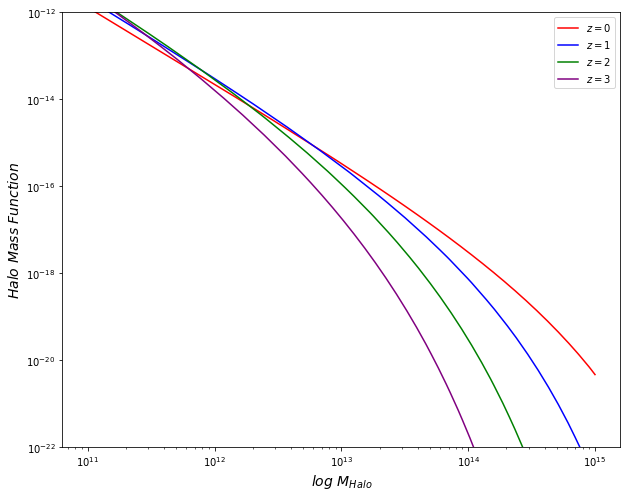

In [15]:
#### This cell takes a while to run. Avoid running if possible
mhalo = np.logspace(11, 15, 5000)
z = [0, 1, 2, 3]
color = ['red', 'blue', 'green', 'purple']

plt.figure(figsize = (10,8))
plt.xlabel('$log \ M_{Halo}$', fontsize = 14)
plt.ylabel('$Halo \ Mass \ Function$', fontsize = 14)
axes = plt.gca()
axes.set_ylim([1e-22, 1e-12])

for i in range(len(z)):
    n_mhalo = halo_mass_function(mhalo, z[i])
    plt.loglog(mhalo, n_mhalo, label = '$z = $' + str(z[i]), c = color[i])
plt.legend()

## Time to do the same as I did with the HMFcalc mass functions. I need to go from Halo Mass to Galaxy Mass to Black Hole Mass. 

### Converting from Halo Mass to Galaxy Mass

In [16]:
HMFZ0 = halo_mass_function(mhalo, 0)
HMFZ1 = halo_mass_function(mhalo, 1)
HMFZ2 = halo_mass_function(mhalo, 2)
HMFZ3 = halo_mass_function(mhalo, 3)

5000
100
[  1.00000000e+11   1.00184413e+11   1.00369167e+11 ...,   9.96321908e+14
   9.98159260e+14   1.00000000e+15]


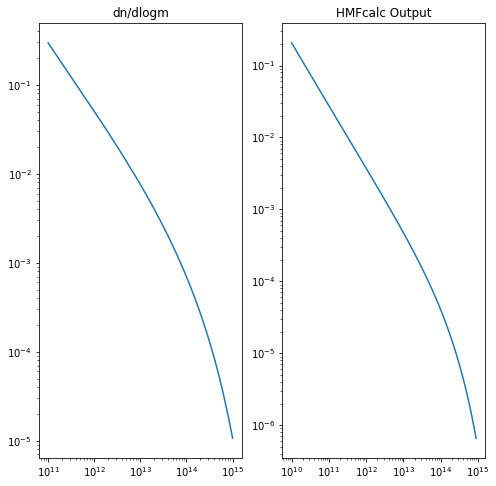

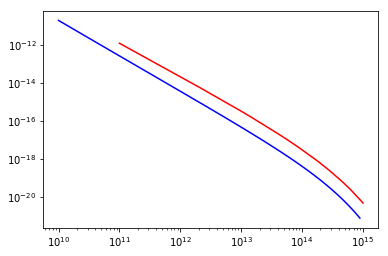

In [17]:
#### TESTING

x = mhalo/np.log10(mhalo)

y = HMFZ0 * mhalo * np.log(10)

HMFcalcdndm = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz0.txt', skiprows = 12, usecols = 5)

HMFcalcZ1 = np.loadtxt('/Users/kellywhalen/quasars/all_plots/mz1.txt', skiprows = 12, usecols = 6)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.loglog(mhalo, y)
plt.title('dn/dlogm')

plt.subplot(1,2,2)
#plt.loglog(mhalo, HMFZ0)
#plt.title('dn/dm')



plt.subplot(1,2,2)
plt.loglog(m, HMFcalcZ0)
plt.title('HMFcalc Output')
print len(mhalo)
print len(m)

plt.figure()
plt.loglog(mhalo, HMFZ0, 'r')
plt.loglog(m, HMFcalcdndm, 'b' )

print mhalo

## Convert HMFs from dn/dm to dn/dlogm

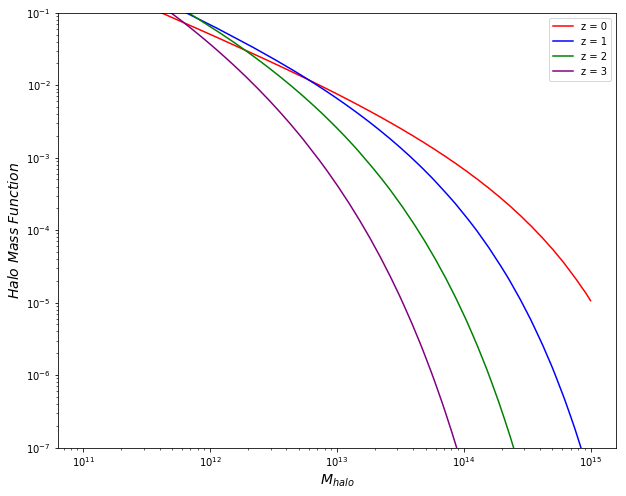

In [18]:
HMFZ0 = HMFZ0 * mhalo * np.log(10)
HMFZ1 = HMFZ1 * mhalo * np.log(10)
HMFZ2 = HMFZ2 * mhalo * np.log(10)
HMFZ3 = HMFZ3 * mhalo * np.log(10)

plt.figure(figsize = (10,8))
plt.loglog(mhalo, HMFZ0, label = 'z = 0', c='red')
plt.loglog(mhalo, HMFZ1, label = 'z = 1', c = 'blue')
plt.loglog(mhalo, HMFZ2, label = 'z = 2', c = 'green')
plt.loglog(mhalo, HMFZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$M_{halo}$', fontsize = 14)
plt.ylabel('$Halo\ Mass\ Function$', fontsize = 14)
axes = plt.gca()
axes.set_ylim([1e-7, 1e-1])
plt.legend()

In [19]:
c = 0.129
M0 = 10.**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440
mZ1 = np.logspace(10, 16, 1000)

mZ0 = mhalo
mZ1 = mhalo
mZ2 = mhalo
mZ3 = mhalo

smZ0 = c*((mZ0/M0)**(-1*alpha) + (mZ0/M0)**(beta))**(-1*gamma)
smZ1 = c*((mZ1/M0)**(-1*alpha) + (mZ1/M0)**(beta))**(-1*gamma)
smZ2 = c*((mZ2/M0)**(-1*alpha) + (mZ2/M0)**(beta))**(-1*gamma)
smZ3 = c*((mZ3/M0)**(-1*alpha) + (mZ3/M0)**(beta))**(-1*gamma)


5000 5000


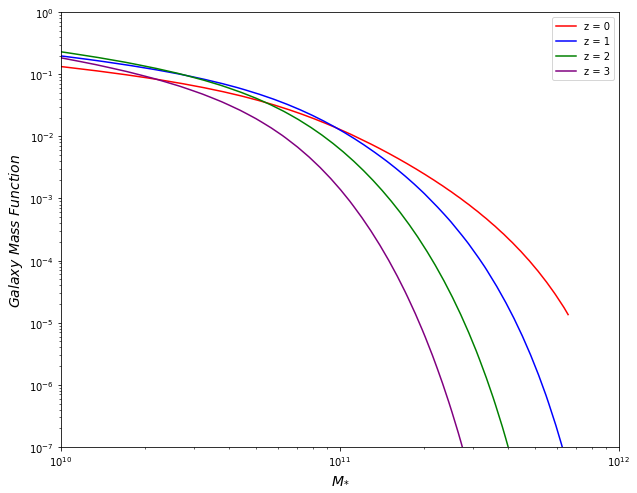

In [20]:
# converting Halo Mass Function to Galaxy Mass Function
stellarmZ0 = smZ0*mZ0
stellarmZ1 = smZ1*mZ1
stellarmZ2 = smZ2*mZ2
stellarmZ3 = smZ3*mZ3

logMstellar = np.log10(stellarmZ0)
logMh = np.log10(stellarmZ0/smZ0)

convert = logMh/logMstellar

smfZ0 = HMFZ0 * convert
smfZ1 = HMFZ1 * convert
smfZ2 = HMFZ2 * convert
smfZ3 = HMFZ3 * convert

#smfZ0 = HMFZ0 / smZ0
#smfZ1 = HMFZ1 / smZ1
#smfZ2 = HMFZ2 / smZ2
#smfZ3 = HMFZ3 / smZ3



print len(stellarmZ0), len(smZ0)

plt.figure(figsize = (10,8))
plt.loglog(stellarmZ0, smfZ0, label = 'z = 0', c='red')
plt.loglog(stellarmZ1, smfZ1, label = 'z = 1', c = 'blue')
plt.loglog(stellarmZ2, smfZ2, label = 'z = 2', c = 'green')
plt.loglog(stellarmZ3, smfZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$M_{*}$', fontsize = 14)
plt.ylabel('$Galaxy\ Mass\ Function$', fontsize = 14)
axes = plt.gca()
axes.set_ylim([1e-7, 1e0])
axes.set_xlim([1e10, 1e12])
plt.legend()

### Converting from Galaxy Mass to Black Hole Mass

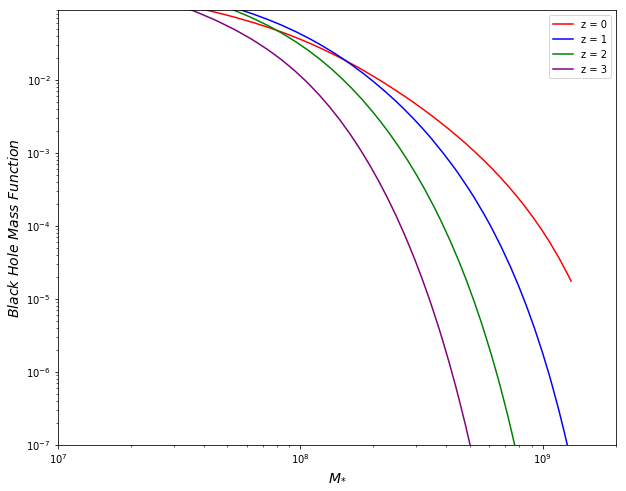

In [21]:
bhm = 10**(8.20 + 1.12*np.log10(stellarmZ1/1.e11))

logMbh = 8.2 + 1.12*(np.log10(stellarmZ1) - 11)
logMstellar = ((logMbh - 8.2)/1.12) + 11

startobh = logMstellar/logMbh

bhmfZ0 = smfZ0 * startobh
bhmfZ1 = smfZ1 * startobh
bhmfZ2 = smfZ2 * startobh
bhmfZ3 = smfZ3 * startobh

plt.figure(figsize = (10,8))
plt.loglog(bhm, bhmfZ0, label = 'z = 0', c='red')
plt.loglog(bhm, bhmfZ1, label = 'z = 1', c = 'blue')
plt.loglog(bhm, bhmfZ2, label = 'z = 2', c = 'green')
plt.loglog(bhm, bhmfZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$M_{*}$', fontsize = 14)
plt.ylabel('$Black \ Hole \ Mass\ Function$', fontsize = 14)
axes = plt.gca()
axes.set_xlim([1e7, 2e9])
axes.set_ylim([1e-7, 9e-2])
plt.legend()

# Next Step: Get an Eddington luminosity function from my black hole mass function

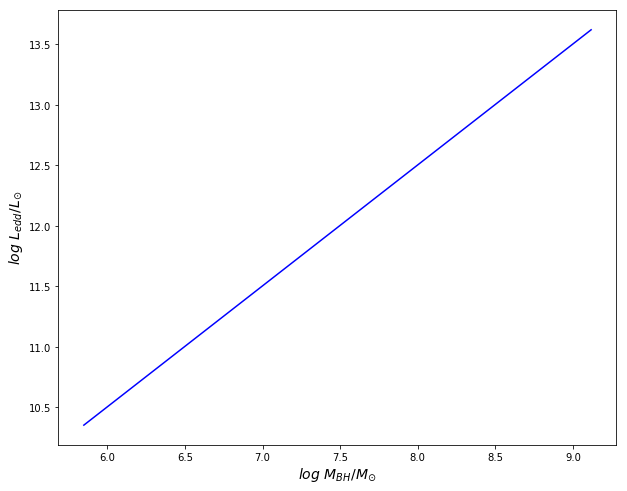

In [22]:
log_bhm = logMbh
Mbh = 10**logMbh

Ledd = 3.2e4 * Mbh
logLedd = np.log10(Ledd)

bhmtoledd = logLedd/log_bhm

plt.figure(figsize= (10,8))
plt.plot(log_bhm, logLedd, 'b')
plt.xlabel('$log \\ M_{BH}/M_{\odot}$', fontsize = 14)
plt.ylabel('$log \\ L_{edd}/L_{\odot}$', fontsize = 14)

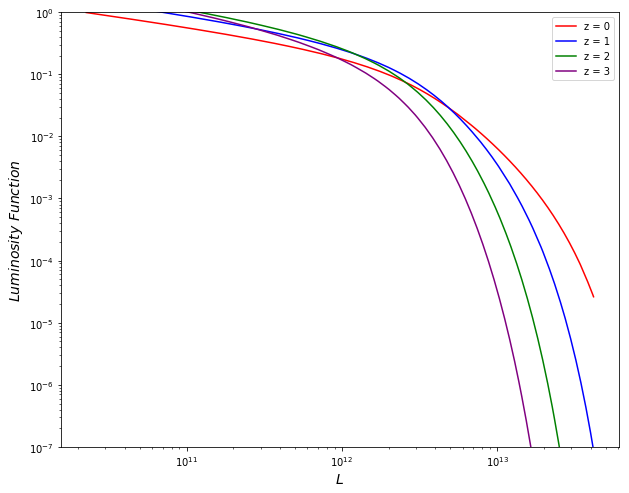

In [23]:
LumFZ0 = bhmfZ0 * bhmtoledd
LumFZ1 = bhmfZ1 * bhmtoledd
LumFZ2 = bhmfZ2 * bhmtoledd
LumFZ3 = bhmfZ3 * bhmtoledd

plt.figure(figsize = (10,8))
plt.loglog(Ledd, LumFZ0, label = 'z = 0', c='red')
plt.loglog(Ledd, LumFZ1, label = 'z = 1', c = 'blue')
plt.loglog(Ledd, LumFZ2, label = 'z = 2', c = 'green')
plt.loglog(Ledd, LumFZ3, label = 'z = 3', c = 'purple')
plt.xlabel('$L$', fontsize = 14)
plt.ylabel('$Luminosity \ Function$', fontsize = 14)
axes = plt.gca()
axes.set_ylim([1e-7, 1e0])
#axes.set_xlim([1e7, 1e14])
plt.legend()

# Comparing HMFcalc to Mike's Code at z = 1

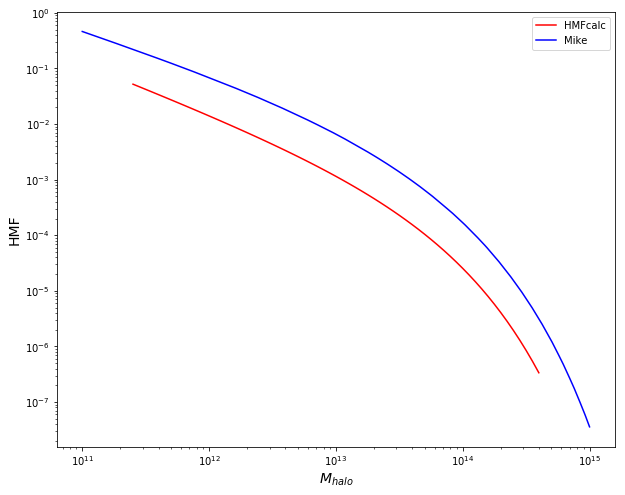

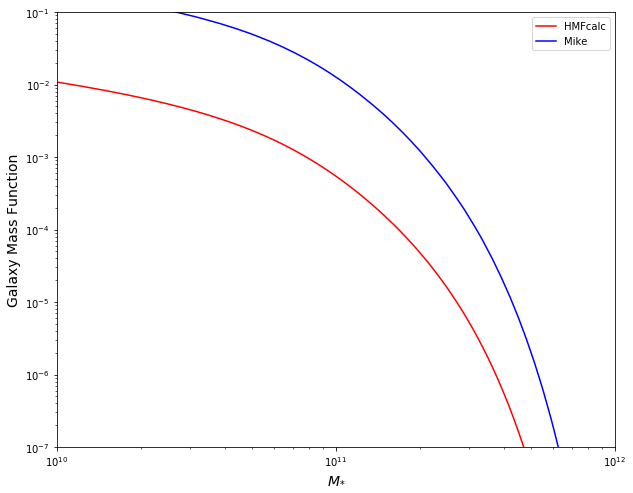

In [24]:
plt.figure(figsize = (10,8))
plt.loglog(m, HMFcalcZ1/0.7**4, 'r', label = 'HMFcalc')
plt.loglog(mhalo, HMFZ1, 'b', label = 'Mike')
plt.xlabel('$M_{halo}$', fontsize = 14)
plt.ylabel('HMF', fontsize = 14)
plt.legend()

plt.figure(figsize = (10,8))
plt.loglog(HMFcalcstellarmZ1, HMFcalcsmfZ1, 'r', label = 'HMFcalc')
plt.loglog(stellarmZ1, smfZ1, 'b', label = 'Mike')
plt.xlabel('$M_{*}$', fontsize = 14)
plt.ylabel('Galaxy Mass Function', fontsize = 14)
axes = plt.gca()
axes.set_ylim([1e-7, 1e-1])
axes.set_xlim([1e10, 1e12])
plt.legend()



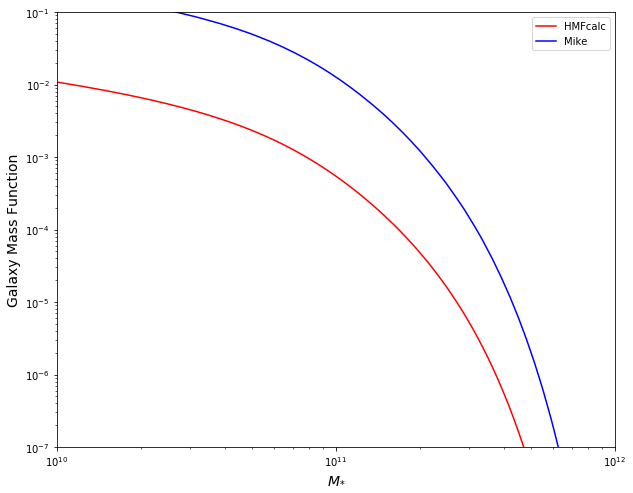

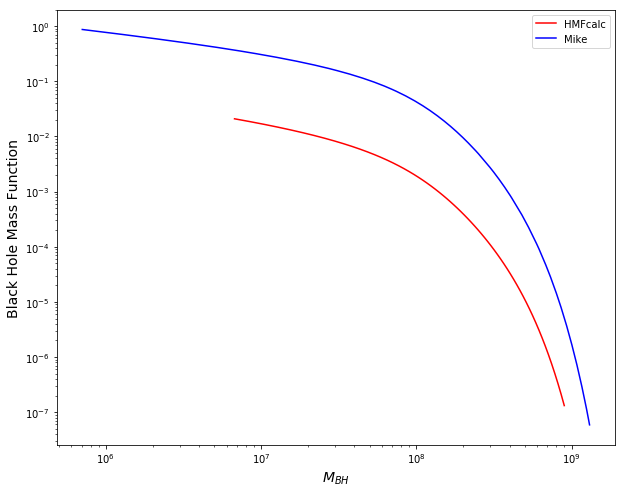

In [25]:
plt.figure(figsize = (10,8))
plt.loglog(HMFcalcstellarmZ1, HMFcalcsmfZ1, 'r', label = 'HMFcalc')
plt.loglog(stellarmZ1, smfZ1, 'b', label = 'Mike')
plt.xlabel('$M_{*}$', fontsize = 14)
plt.ylabel('Galaxy Mass Function', fontsize = 14)
axes = plt.gca()
axes.set_ylim([1e-7, 1e-1])
axes.set_xlim([1e10, 1e12])
plt.legend()

plt.figure(figsize = (10,8))
plt.loglog(HMFcalcbhmZ1, HMFcalcbhmfZ1, 'r', label = 'HMFcalc')
plt.loglog(bhm, bhmfZ1, 'b', label = 'Mike')
plt.xlabel('$M_{BH}$', fontsize = 14)
plt.ylabel('Black Hole Mass Function', fontsize = 14)
axes = plt.gca()
#axes.set_ylim([1e-7, 1e-1])
#axes.set_xlim([1e10, 1e12])
plt.legend()

10.3537596918


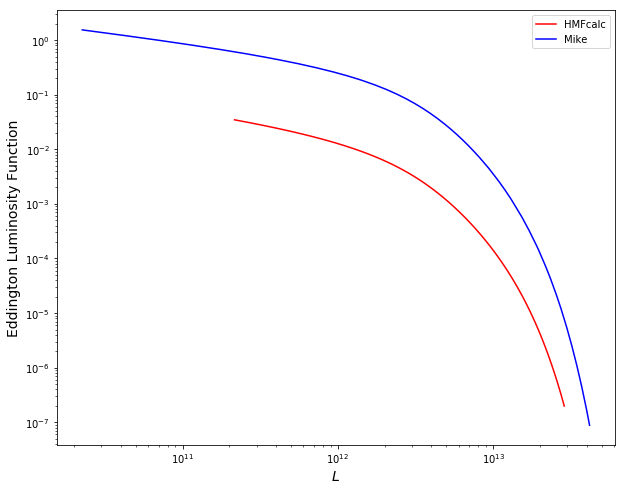

In [26]:
plt.figure(figsize = (10,8))
plt.loglog(HMFcalcLZ1, HMFcalcLFZ1, 'r', label = 'HMFcalc')
plt.loglog(Ledd, LumFZ1, 'b', label = 'Mike')
plt.xlabel('$L$', fontsize = 14)
plt.ylabel('Eddington Luminosity Function', fontsize = 14)
axes = plt.gca()
#axes.set_ylim([1e-7, 1e-1])
#axes.set_xlim([1e10, 1e12])
plt.legend()

print np.log10(Ledd[0])

# Creating a random distribution of halos

In [27]:
def schechterL(Lambda, eta, alpha, t0):
    return t0 * (Lambda/eta)**(-alpha)*np.exp(-1*(Lambda)) #### THIS CELL IS NOT COMPLETE

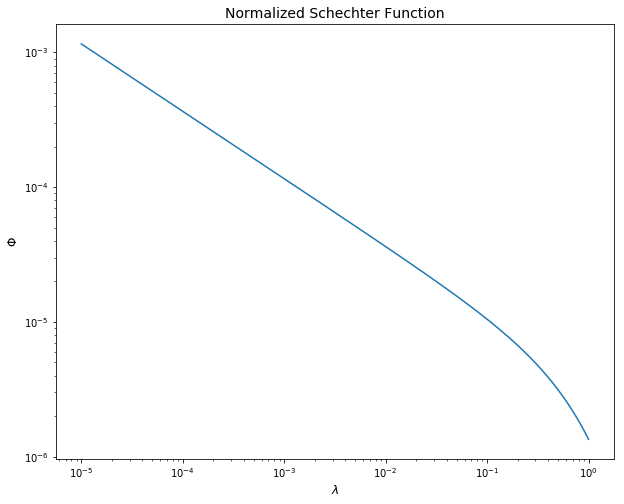

In [28]:
Lambda = np.logspace(-5, 0, 5000)

schechter = schechterL(Lambda, 1.0, 0.5, 1.e8)/np.sum(schechterL(Lambda, 1.0, 0.5, 1.e8))

plt.figure(figsize = (10,8))
plt.loglog(Lambda, schechter)
plt.title('Normalized Schechter Function', fontsize = 14)
plt.xlabel('$\lambda$', fontsize = 12)
plt.ylabel('$\Phi$', fontsize = 12)



In [29]:
test = np.logspace(-4, 0, 1000000)
print np.mean(test)

0.108563154602


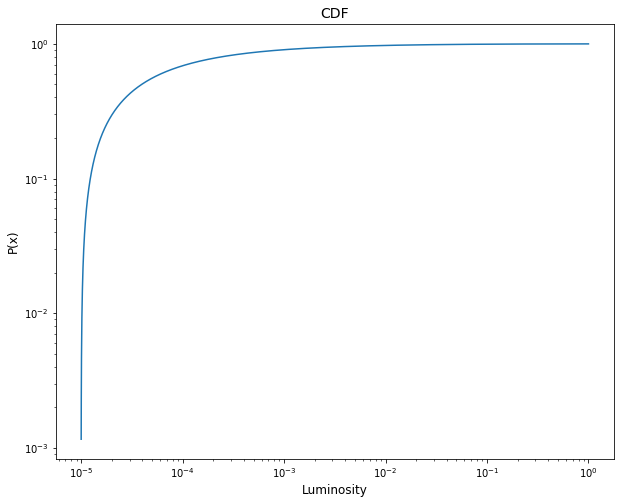

In [30]:
schechterCDF = np.cumsum(schechter/np.sum(schechter))

plt.figure(figsize = (10,8))
plt.loglog(Lambda, schechterCDF)
plt.title('CDF', fontsize = 14)
plt.xlabel('Luminosity', fontsize = 12)
plt.ylabel('P(x)', fontsize = 12)

1e-05 1.0


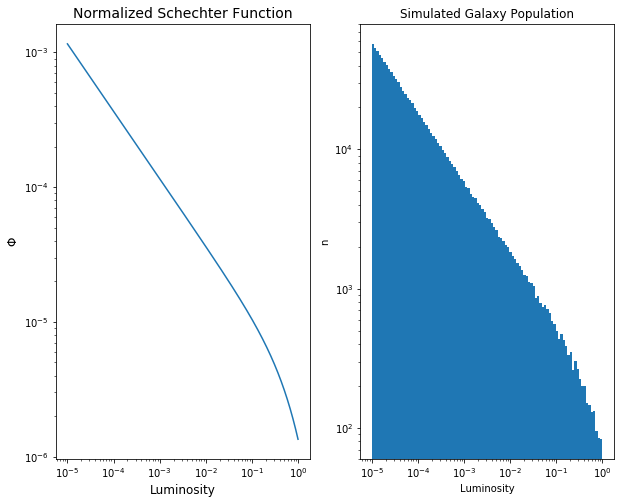

In [31]:
#### Ignore this cell

Lplot = Lambda#/1.4e10 ## get this to dphi/dlogL

uCDF, uflag = np.unique(schechterCDF, return_index=True)
Lplot = Lplot[uflag]

randomPoints = np.random.uniform(low = min(uCDF), high = max(uCDF), size = 1000000)
f1 = interp1d(uCDF, Lplot)
#print min(uCDF), min(randomPoints)
randoData = f1(np.sort(randomPoints))

plt.figure(figsize = (10,8))
plt.subplot(1, 2, 1)
plt.loglog(Lplot, (schechter/np.sum(schechter))[uflag])
plt.title('Normalized Schechter Function', fontsize = 14)
plt.xlabel('Luminosity', fontsize = 12)
plt.ylabel('$\Phi$', fontsize = 12)

plt.subplot(1, 2, 2)
plt.hist(randoData, bins = np.logspace(-5, 0, 100) , log = True, range = (min(Lplot), max(Lplot)))
axes = plt.gca()
#axes.set_ylim([0,40])
axes.set_xscale("log")
plt.xlabel('Luminosity')
plt.ylabel('n')
plt.title('Simulated Galaxy Population')

print min(Lplot), max(Lplot)

# Do the same as above, but for a weighted population of galaxies with a constant distribution of masses (at z=1 for now)

In [32]:
mhalos = np.logspace(12, 15,10000)
nhalos = np.ones(10000)*100.

hmf = halo_mass_function(mhalos, 1)*mhalos*np.log(10)

In [33]:
hmf = hmf/np.sum(hmf)

In [34]:
Lambda = np.logspace(-4, 0, 10000)
nL = nhalos
schechter = schechterL(Lambda, 1.0, 0.5, 1.e8)/np.sum(schechterL(Lambda, 1.0, 0.5, 1.e8))

/Users/kellywhalen/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=100.0, top=100.0
  'bottom=%s, top=%s') % (bottom, top))


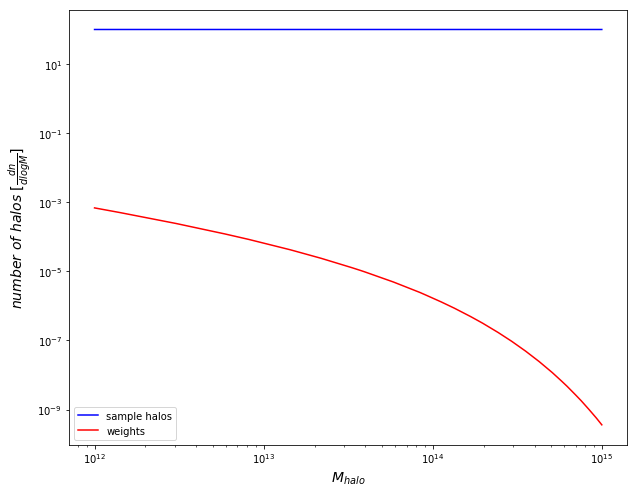

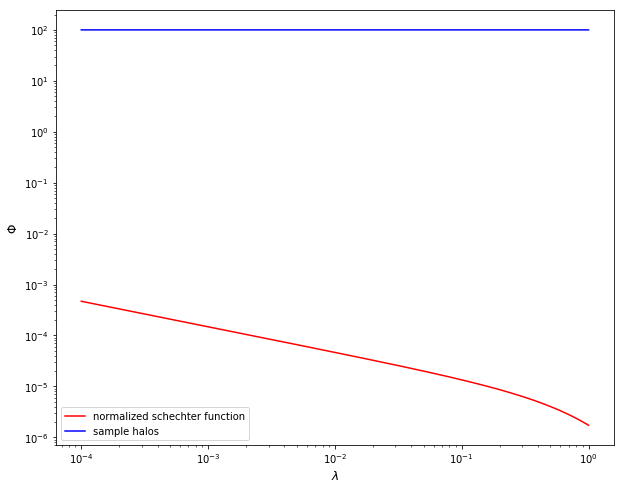

In [35]:
plt.figure(figsize = (10,8))
plt.loglog(mhalos, nhalos, 'b', label = 'sample halos')
plt.loglog(mhalos, hmf, 'r', label = 'weights')
plt.xlabel('$M_{halo}$', fontsize = 14)
plt.ylabel('$number \ of \ halos \ [\\frac{dn}{d log M}]$', fontsize = 14)
plt.legend()

plt.figure(figsize = (10,8))
plt.loglog(Lambda, schechter, 'r', label = 'normalized schechter function')
plt.loglog(Lambda, nL, 'b', label = 'sample halos')
#plt.title('Normalized Schechter Function', fontsize = 14)
plt.xlabel('$\lambda$', fontsize = 12)
plt.ylabel('$\Phi$', fontsize = 12)
plt.legend()

In [36]:
weights = hmf * schechter

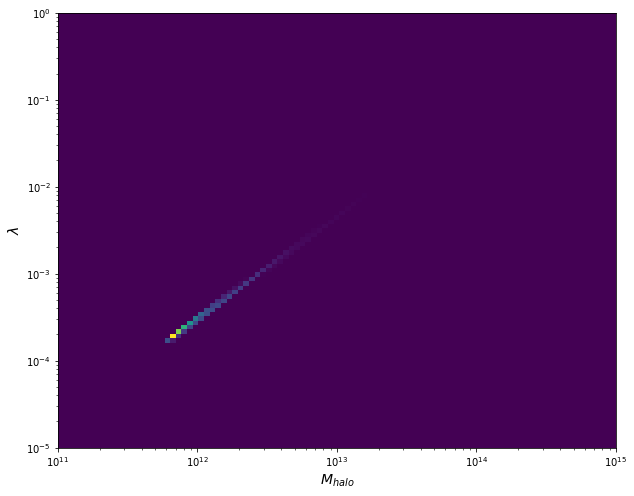

In [37]:
xbins = np.logspace(11, 15, 100)
ybins = np.logspace(-5, 0, 100)


plt.figure(figsize = (10,8))
histogram, xedges, yedges = np.histogram2d(Lambda, mhalos, weights = weights, bins = [ybins, xbins])
axes = plt.gca()
axes.pcolormesh(xbins, ybins, histogram.T)
axes.set_xscale("log")
axes.set_yscale("log")
plt.xlabel('$M_{halo}$', fontsize = 14)
plt.ylabel('$\lambda$', fontsize = 14)


## Obtaining $F_{obscured}$: Ricci et al. 2017

-4.0 -0.200020002


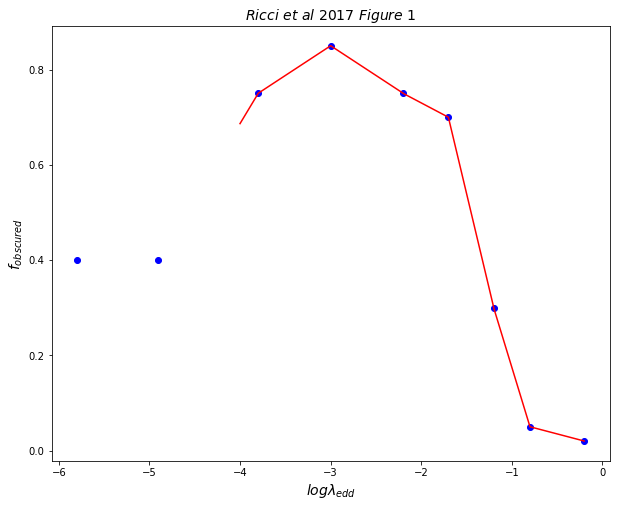

In [38]:
logLedd = [-5.8, -4.9, -3.8, -3.0, -2.2, -1.7, -1.2, -0.8, -0.2]
fobs = [0.4, 0.4, 0.75, 0.85, 0.75, 0.70, 0.30, 0.05, 0.02]

interpFlag = (np.log10(Lambda) < -0.2) & (np.log10(Lambda) > -5.8)

#test = np.linspace(-5, -1, 10000)

print np.log10(Lambda)[interpFlag][0], np.log10(Lambda)[interpFlag][-1]

logLambda = np.log10(Lambda)[interpFlag]

interpf = interp1d(logLedd, fobs, bounds_error=False)
fobscured = interpf(logLambda)

plt.figure(figsize = (10,8))
plt.plot(logLedd, fobs, 'bo')
plt.plot(logLambda, fobscured, 'r')

plt.xlabel('$log \lambda _{edd}$', fontsize = 14)
plt.ylabel('$f_{obscured}$', fontsize = 14)
plt.title('$Ricci \ et\ al\ 2017\ Figure\ 1$', fontsize = 14)

# Create a random galaxy sample that matches the above distribution, and then determine if galaxies at a certain $\lambda _{edd}$ are obscured

### Take the 2-D histogram from above, and plot it in 1-D vs $\lambda _{edd}$

In [39]:
weights = weights# / np.sum(weights)

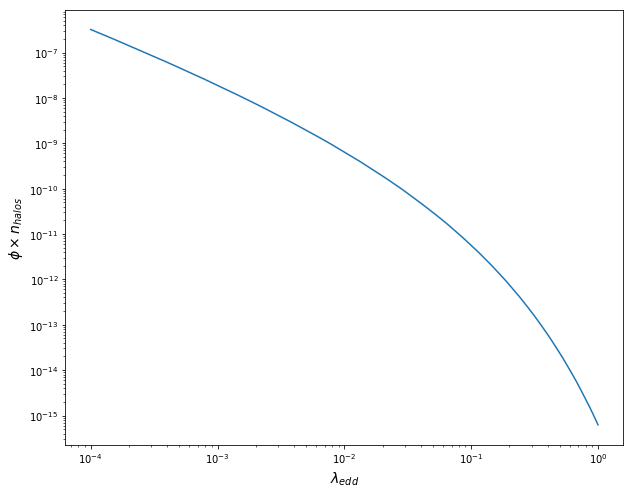

In [40]:
plt.figure(figsize = (10,8))
plt.loglog(Lambda, weights)
plt.xlabel('$\lambda _{edd}$', fontsize = 14)
plt.ylabel('$\phi \\times n_{halos}$', fontsize = 14)




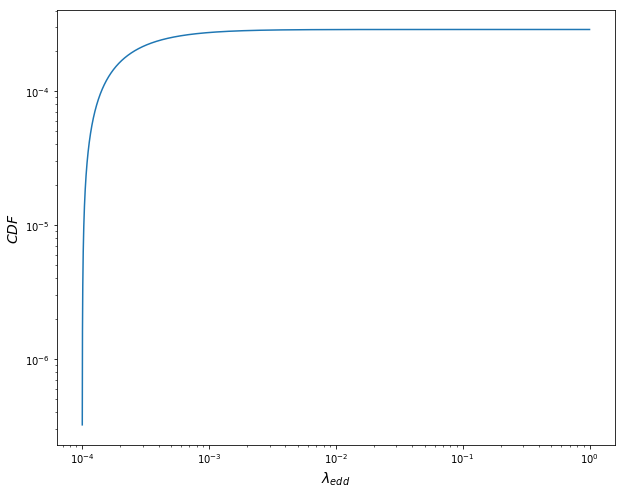

In [41]:
weightCDF = np.cumsum(weights)
plt.figure(figsize = (10,8))
plt.loglog(Lambda, weightCDF)
plt.xlabel('$\lambda _{edd}$', fontsize = 14)
plt.ylabel('$CDF$', fontsize = 14)

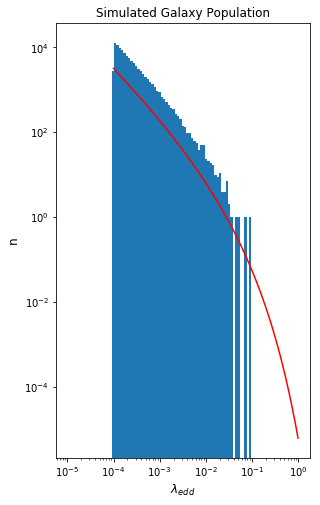

In [42]:
testPoints = np.random.uniform(min(weightCDF), max(weightCDF), size = 100000)

weightf = interp1d(weightCDF, Lambda)
haloSample = weightf(testPoints)

plt.figure(figsize = (10,8))
plt.subplot(1, 2, 1)
plt.loglog(Lambda, weights*1e10, 'r')
plt.title('Halo Distribution', fontsize = 14)
plt.xlabel('$\lambda _{edd}$', fontsize = 12)
plt.ylabel('$n_{halos}$', fontsize = 12)

plt.subplot(1, 2, 1)
plt.hist(haloSample, bins = np.logspace(-5, 0, 100) , log = True, range = (min(Lambda), max(Lambda)))
axes = plt.gca()
axes.set_xscale("log")
plt.xlabel('$\lambda _{edd}$', fontsize = 12)
plt.ylabel('n')
plt.title('Simulated Galaxy Population')


In [43]:
haloSample = np.sort(haloSample)

In [44]:
logLedd = [-5.8, -4.9, -3.8, -3.0, -2.2, -1.7, -1.2, -0.8, -0.2]
fobs = [0.4, 0.4, 0.75, 0.85, 0.75, 0.70, 0.30, 0.05, 0.02]

interpFlag = (np.log10(haloSample) < -0.2) & (np.log10(haloSample) > -5.8)

#test = np.linspace(-5, -1, 10000)

#print np.log10(Lambda)[interpFlag][0], np.log10(Lambda)[interpFlag][-1]

haloSample = np.log10(haloSample)[interpFlag]

interpf = interp1d(logLedd, fobs, bounds_error=False)
fobscured = interpf(haloSample)


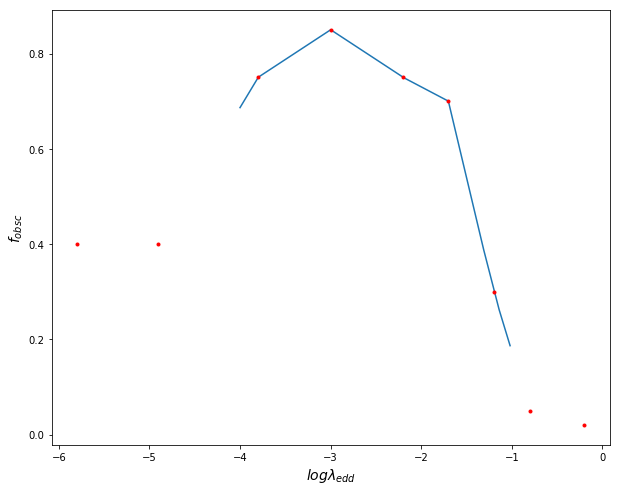

In [45]:
plt.figure(figsize = (10, 8))
plt.plot(haloSample, fobscured)
plt.plot(logLedd, fobs, 'r.')
plt.xlabel('$log \lambda_{edd}$', fontsize = 14)
plt.ylabel('$f_{obsc}$', fontsize = 14)


### Determine if my sources are obscured or unobscured

In [46]:
randomFrac = np.random.random(size = len(fobscured))

obscuredFlag = randomFrac < fobscured ### True means obscured
unobscuredFlag = !obscuredFlag

print sum(obscuredFlag), len(obscuredFlag)

76023 100000


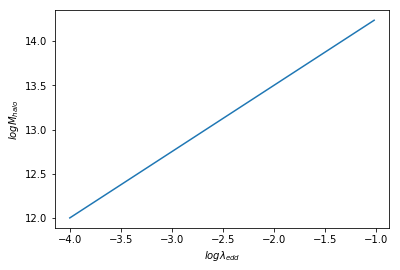

In [47]:
f_halos = interp1d(np.log10(Lambda), np.log10(mhalos), bounds_error = False, fill_value= 'extrapolate')
loghaloMasses = f_halos(haloSample)

plt.figure()
plt.plot(haloSample, loghaloMasses)
plt.xlabel('$log \lambda _{edd}$')
plt.ylabel('$log M_{halo}$')

In [48]:
#obscured = loghaloMasses[obscuredFlag]
#unobscured = loghaloMasses[unobscuredFlag]
print  len(loghaloMasses), len(obscuredFlag), len(logLedd)
#plt.figure(figsize = (10,8))
#plt.hist(obscured)

100000 100000 9


# Come back to above cells later- try uniformly sampled halos instead

## Generate sample halo masses

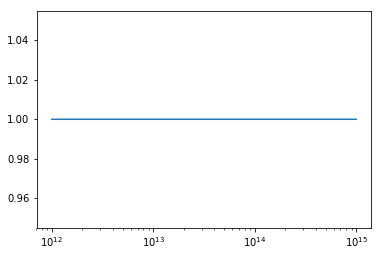

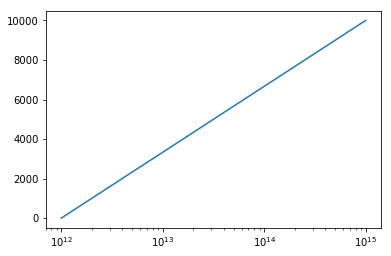

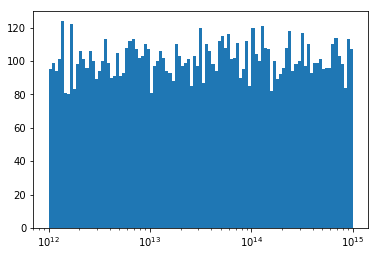

In [49]:
n = np.ones(10000)

plt.figure()
plt.semilogx(mhalos, n)


halocdf = np.cumsum(n)

plt.figure()
plt.semilogx(mhalos, halocdf)

randomPoints = np.random.uniform(min(halocdf), max(halocdf), size = 10000)
z = interp1d(halocdf, mhalos)
haloSample = z(randomPoints)

plt.figure()
plt.hist(haloSample, bins = np.logspace(12, 15, 100), range = (min(mhalos), max(mhalos)))[2]
axes = plt.gca()
axes.set_xscale("log")

## Generate sample eddington ratios

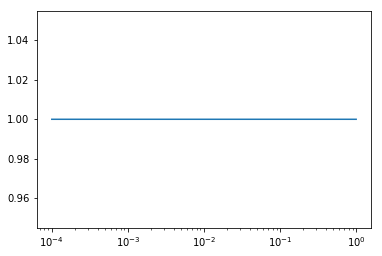

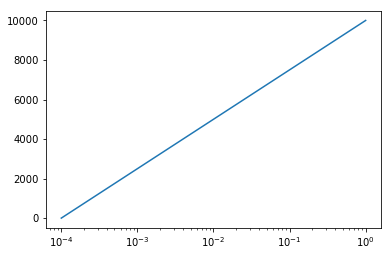

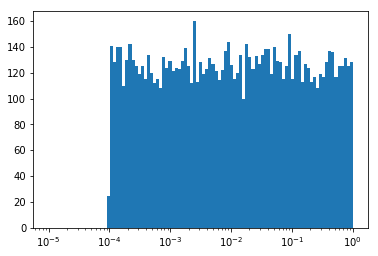

In [50]:
n = np.ones(10000)

plt.figure()
plt.semilogx(Lambda, n)


ratiocdf = np.cumsum(n)

plt.figure()
plt.semilogx(Lambda, ratiocdf)

randomratio = np.random.uniform(min(ratiocdf), max(ratiocdf), size = 10000)
y = interp1d(ratiocdf, Lambda)
ratioSample = y(randomratio)

plt.figure()
plt.hist(ratioSample, bins = np.logspace(-5, 0, 100), range = (min(Lambda), max(Lambda)))
axes = plt.gca()
axes.set_xscale("log")

## Get hmf and schechter functions for my randomly sampled halo masses and Eddington ratios

In [51]:
#sortedHalos = np.sort(haloSample)
#hmfSample = halo_mass_function(sortedHalos, 1)*sortedHalos*np.log(10)

sortedHalos = haloSample
hmfSample = halo_mass_function(sortedHalos, 1)*sortedHalos*np.log(10)

In [52]:
#sortedRatios = np.sort(ratioSample)
#schechterSample = schechterL(sortedRatios, 1.0, 0.5, 1.e8)/np.sum(schechterL(sortedRatios, 1.0, 0.5, 1.e8))

sortedRatios = ratioSample
schechterSample = schechterL(sortedRatios, 1.0, 0.5, 1.e8)/np.sum(schechterL(sortedRatios, 1.0, 0.5, 1.e8))

In [53]:
weights = hmfSample * schechterSample

## Get  $\ f_{obsc}$ for sample

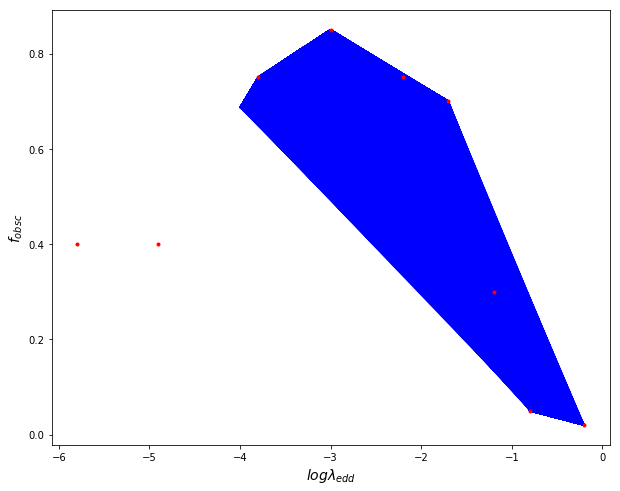

In [54]:
logLedd = [-5.8, -4.9, -3.8, -3.0, -2.2, -1.7, -1.2, -0.8, -0.2]
fobs = [0.4, 0.4, 0.75, 0.85, 0.75, 0.70, 0.30, 0.05, 0.02]

interpFlag = (np.log10(sortedRatios) < -0.2) & (np.log10(sortedRatios) > -5.8)

ratioSample = np.log10(sortedRatios)[interpFlag]

interpf = interp1d(logLedd, fobs, bounds_error=False)
fobscured = interpf(ratioSample)


plt.figure(figsize = (10, 8))
plt.plot(ratioSample, fobscured, 'b-')
plt.plot(logLedd, fobs, 'r.')
plt.xlabel('$log \lambda_{edd}$', fontsize = 14)
plt.ylabel('$f_{obsc}$', fontsize = 14)

## Determine if each halo mass is obscured

In [55]:
interpWeights = weights[interpFlag]/max(weights[interpFlag])

In [56]:
randomFrac = np.random.random(size = len(fobscured))

obscuredFlag = randomFrac < fobscured ### True means obscured
unobscuredFlag = randomFrac >= fobscured

In [57]:
#### check to make sure that I get the right f_obsc for each eddington ratio

In [58]:
halosSamplei = sortedHalos[interpFlag]

In [59]:
obscuredHalos = halosSamplei[obscuredFlag]
unobscuredHalos = halosSamplei[unobscuredFlag]

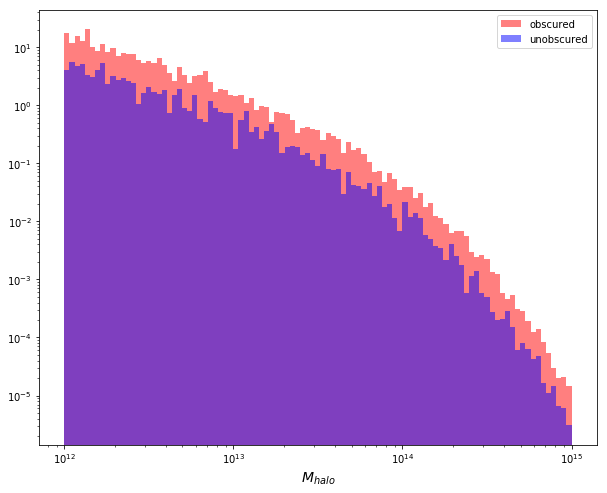

In [60]:
plt.figure(figsize = (10,8))
plt.hist(obscuredHalos, weights = interpWeights[obscuredFlag], bins = np.logspace(12, 15, 100), range = (min(mhalos), max(mhalos)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(unobscuredHalos, weights = interpWeights[unobscuredFlag], bins = np.logspace(12, 15, 100), range = (min(mhalos), max(mhalos)), color = 'blue', label = 'unobscured', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.xlabel('$M_{halo}$', fontsize = 14)



## Include a luminosity cut from DiPompeo et al. 2017

### First convert from halo mass to black hole mass

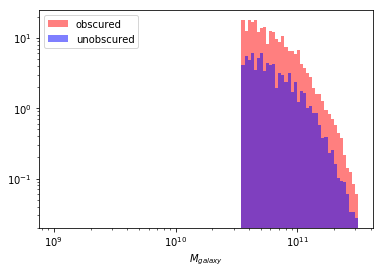

In [61]:
# Halo Mass to Galaxy mass

c = 0.129
M0 = 10.**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440

galaxySample = c*((halosSamplei/M0)**(-1*alpha) + (halosSamplei/M0)**(beta))**(-1*gamma)


stellarmassSample = galaxySample*halosSamplei


logSM = np.log10(stellarmassSample)
logHaloMass = np.log10(stellarmassSample/galaxySample)

convert = logHaloMass/logSM
GMF = hmfSample[interpFlag] * convert

plt.figure()
plt.hist(stellarmassSample[obscuredFlag], weights = interpWeights[obscuredFlag], bins = np.logspace(9, 11.5, 100), range = (min(stellarmassSample), max(stellarmassSample)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(stellarmassSample[unobscuredFlag], weights = interpWeights[unobscuredFlag], bins = np.logspace(9, 11.5, 100), range = (min(stellarmassSample), max(stellarmassSample)), label = 'unobscured', color = 'blue', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.xlabel('$M_{galaxy}$')
plt.legend()


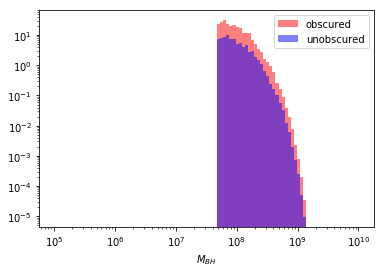

In [62]:
### Galaxy Mass to Black Hole Mass

bhmSample = 10**(8.20 + 1.12*np.log10(stellarmassSample/1.e11))

logMbhSample = 8.2 + 1.12*(np.log10(stellarmassSample) - 11)
logMstellarSample = ((logMbhSample - 8.2)/1.12) + 11

startobhSample = logMstellarSample/logMbhSample

bhmfSample = GMF * startobhSample

plt.figure()
plt.hist(bhmSample[obscuredFlag], weights = interpWeights[obscuredFlag], bins = np.logspace(5, 10, 100), range = (min(bhmSample), max(bhmSample)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(bhmSample[unobscuredFlag], weights = interpWeights[unobscuredFlag], bins = np.logspace(5, 10, 100), range = (min(bhmSample), max(bhmSample)), label = 'unobscured', color = 'blue', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.xlabel('$M_{BH}$')
plt.legend()



### Calculate Luminosities [$L_{\odot}$] using these $M_{BH}$ and $\lambda _{edd}$ 

In [63]:
luminosities = 10**(ratioSample) * bhmSample *3.2e4

In [64]:
print np.min(luminosities)

162093789.733


### Actually make the luminosity cut

In [65]:
Lcut = 10**(45.8) /  3.826e33 

In [66]:
lumFlag = luminosities > Lcut
lumFlagobs = lumFlag[obscuredFlag]
lumFlagunobs = lumFlag[unobscuredFlag]

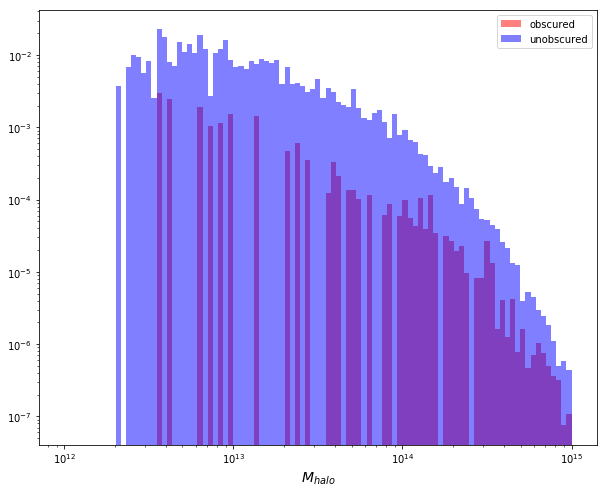

In [67]:
plt.figure(figsize = (10,8))
plt.hist(obscuredHalos[lumFlagobs], weights = interpWeights[obscuredFlag][lumFlagobs], bins = np.logspace(12, 15, 100), range = (min(mhalos), max(mhalos)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(unobscuredHalos[lumFlagunobs], weights = interpWeights[unobscuredFlag][lumFlagunobs], bins = np.logspace(12, 15, 100), range = (min(mhalos), max(mhalos)), color = 'blue', label = 'unobscured', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.xlabel('$M_{halo}$', fontsize = 14)



In [68]:
print sum(lumFlag)

1437


## It is clear that I don't have enough samples.... Interpolate a larger sample size

In [69]:
halomassrange = np.logspace(12, 16, 100)
hmf = halo_mass_function(halomassrange, 1)*halomassrange*np.log(10)

In [70]:
LeddRange = np.logspace(-4, 0, 100)
schech = schechterL(LeddRange, 1.0, 0.5, 1.e8)/np.sum(schechterL(LeddRange, 1.0, 0.5, 1.e8))

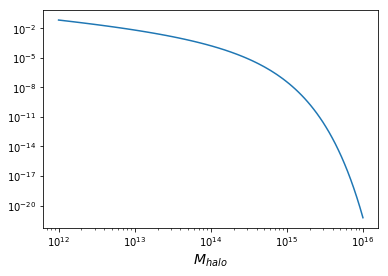

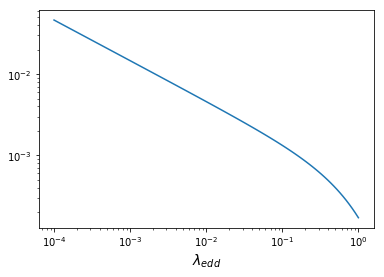

In [71]:
plt.figure()
plt.loglog(halomassrange, hmf)
plt.xlabel('$M_{halo}$', fontsize = 14)

plt.figure()
plt.loglog(LeddRange, schech)
plt.xlabel('$\lambda _{edd}$', fontsize = 14)

### generate large sample of halo masses

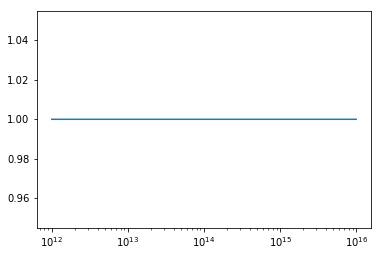

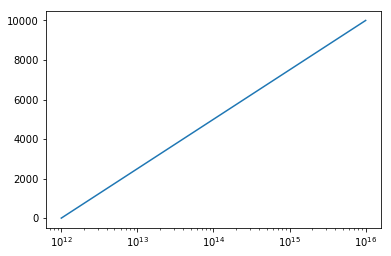

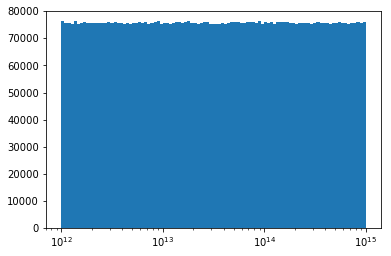

In [72]:
n = np.ones(10000)
largeHMSrange = np.logspace(12, 16, 10000)

plt.figure()
plt.semilogx(largeHMSrange, n)


halocdf = np.cumsum(n)

plt.figure()
plt.semilogx(largeHMSrange, halocdf)

randomPoints = np.random.uniform(min(halocdf), max(halocdf), size = 10000000)
z = interp1d(halocdf, largeHMSrange)
largehaloSample = z(randomPoints)

plt.figure()
plt.hist(largehaloSample, bins = np.logspace(12, 15, 100), range = (min(largeHMSrange), max(largeHMSrange)))[2]
axes = plt.gca()
axes.set_xscale("log")

In [73]:
largeHMFf = interp1d(halomassrange, hmf)
largeHMF = largeHMFf(largehaloSample)

### generate large sample of Eddington Ratios

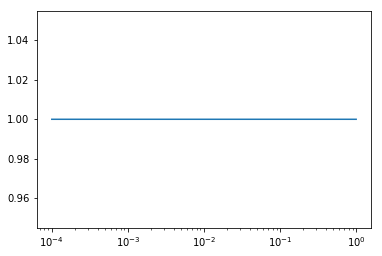

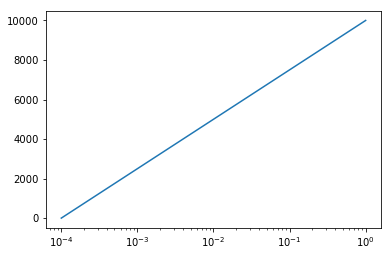

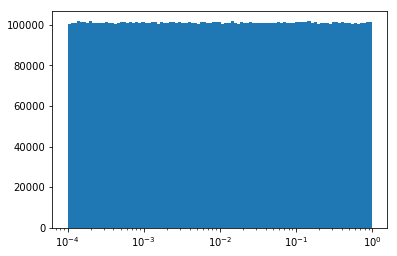

In [75]:
n = np.ones(10000)
largeLambdarange = np.logspace(-4, 0, 10000)

plt.figure()
plt.semilogx(largeLambdarange, n)


Leddcdf = np.cumsum(n)

plt.figure()
plt.semilogx(largeLambdarange, Leddcdf)

randomRatios = np.random.uniform(min(Leddcdf), max(Leddcdf), size = 10000000)
q = interp1d(Leddcdf, largeLambdarange)
largeLeddSample = q(randomRatios)

plt.figure()
plt.hist(largeLeddSample, bins = np.logspace(-4, 0, 100), range = (min(largeLambdarange), max(largeLambdarange)))[2]
axes = plt.gca()
axes.set_xscale("log")

In [76]:
largeschechf = interp1d(LeddRange, schech)
largeSchech = largeschechf(largeLeddSample)

In [77]:
largeWeights = largeSchech * largeHMF

### Get $f_{obsc}$ for larger sample

In [78]:
logLedd = [-5.8, -4.9, -3.8, -3.0, -2.2, -1.7, -1.2, -0.8, -0.2]
fobs = [0.4, 0.4, 0.75, 0.85, 0.75, 0.70, 0.30, 0.05, 0.02]

interpFlag = (np.log10(largeLeddSample) < -0.2) & (np.log10(largeLeddSample) > -5.8)

largeLeddi = np.log10(largeLeddSample)[interpFlag]

interpFunction = interp1d(logLedd, fobs, bounds_error=False)
largefobscured = interpFunction(largeLeddi)

### Determine which halos are obscured

In [79]:
largeWeightsi = largeWeights[interpFlag]/max(largeWeights[interpFlag])

In [80]:
randomFracl = np.random.random(size = len(largefobscured))

largeobscuredFlag = randomFracl < largefobscured ### True means obscured
largeunobscuredFlag = randomFracl >= largefobscured

In [81]:
largehaloSamplei = largehaloSample[interpFlag]

In [82]:
largeobscuredHalos = largehaloSamplei[largeobscuredFlag]
largeunobscuredHalos = largehaloSamplei[largeunobscuredFlag]

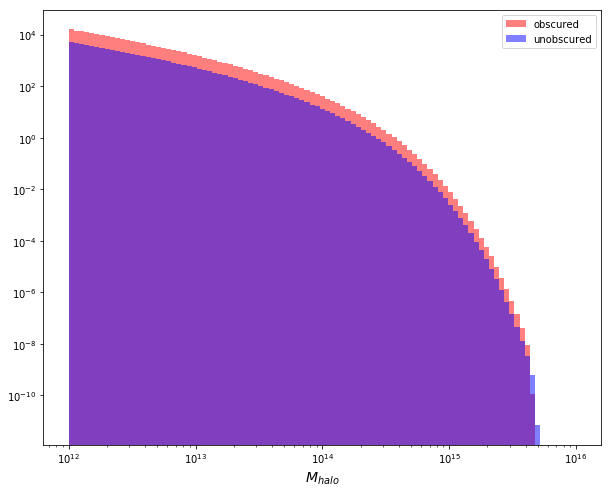

In [83]:
plt.figure(figsize = (10,8))
plt.hist(largeobscuredHalos, weights = largeWeightsi[largeobscuredFlag], bins = np.logspace(12, 16, 100), range = (min(mhalos), max(largeHMSrange)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(largeunobscuredHalos, weights = largeWeightsi[largeunobscuredFlag], bins = np.logspace(12, 16, 100), range = (min(mhalos), max(largeHMSrange)), color = 'blue', label = 'unobscured', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.xlabel('$M_{halo}$', fontsize = 14)

## Now apply a luminosity cut

### Convert Halo Mass to Galaxy Mass

In [84]:
# Halo Mass to Galaxy mass

c = 0.129
M0 = 10.**11.4
alpha = 0.926
beta = 0.261
gamma = 2.440

largegalaxySample = c*((largehaloSamplei/M0)**(-1*alpha) + (largehaloSamplei/M0)**(beta))**(-1*gamma)


largestellarmassSample = largegalaxySample*largehaloSamplei


largelogSM = np.log10(largestellarmassSample)
largelogHaloMass = np.log10(largestellarmassSample/largegalaxySample)

convert = largelogHaloMass/largelogSM
largeGMF = largeHMF[interpFlag] * convert

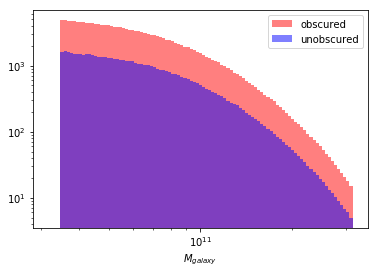

In [85]:
plt.figure()
plt.hist(largestellarmassSample[largeobscuredFlag], weights = largeWeightsi[largeobscuredFlag], bins = np.logspace(10.5, 11.5, 100), range = (min(largestellarmassSample), max(largestellarmassSample)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(largestellarmassSample[largeunobscuredFlag], weights = largeWeightsi[largeunobscuredFlag], bins = np.logspace(10.5, 11.5, 100), range = (min(largestellarmassSample), max(largestellarmassSample)), label = 'unobscured', color = 'blue', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.xlabel('$M_{galaxy}$')
plt.legend()


### Convert Galaxy Mass to Black Hole Mass

In [86]:
largebhmSample = 10**(8.20 + 1.12*np.log10(largestellarmassSample/1.e11))

largelogMbhSample = 8.2 + 1.12*(np.log10(largestellarmassSample) - 11)
largelogMstellarSample = ((largelogMbhSample - 8.2)/1.12) + 11

largestartobhSample = largelogMstellarSample/largelogMbhSample

largebhmfSample = largeGMF * largestartobhSample


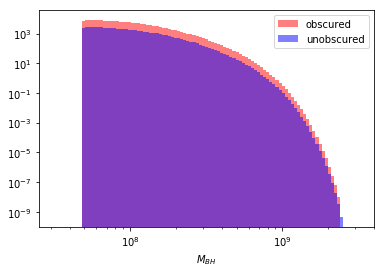

In [87]:
plt.figure()
plt.hist(largebhmSample[largeobscuredFlag], weights = largeWeightsi[largeobscuredFlag], bins = np.logspace(7.5, 9.5, 100), range = (min(bhmSample), max(bhmSample)), label = 'obscured', color = 'red', alpha = 0.5)[2]
plt.hist(largebhmSample[largeunobscuredFlag], weights = largeWeightsi[largeunobscuredFlag], bins = np.logspace(7.5, 9.5, 100), range = (min(bhmSample), max(bhmSample)), label = 'unobscured', color = 'blue', alpha = 0.5)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.xlabel('$M_{BH}$')
plt.legend()

### Calculate Luminosities [$L_{\odot}$] using these $M_{BH}$ and $\lambda _{edd}$ 

In [88]:
largeluminosities = 10**(largeLeddi) * largebhmSample *3.2e4

In [89]:
Lcut = 10**(45.8) /  3.826e33 

In [90]:
largelumFlag = largeluminosities > Lcut
largelumFlagobs = largelumFlag[largeobscuredFlag]
largelumFlagunobs = largelumFlag[largeunobscuredFlag]

In [91]:
nlargeobscuredHalos = largeobscuredHalos[largelumFlagobs] #/ max(largeobscuredHalos[largelumFlagobs])
nlargeunobscuredHalo = largeunobscuredHalos[largelumFlagunobs] #/ max(largeunobscuredHalos[largelumFlagunobs])


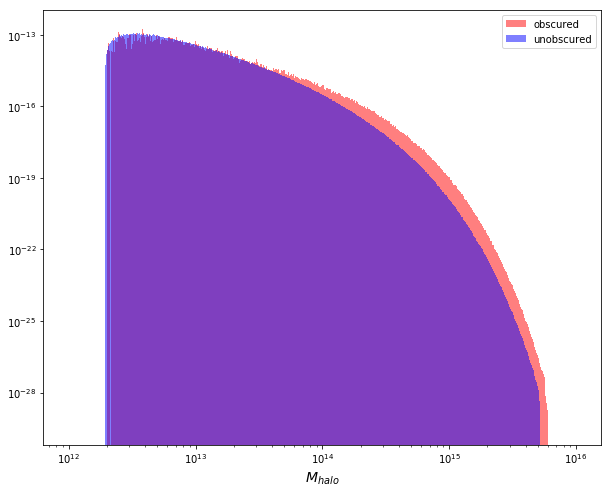

In [92]:
plt.figure(figsize = (10,8))
plt.hist(nlargeobscuredHalos, weights = largeWeightsi[largeobscuredFlag][largelumFlagobs], bins = np.logspace(12, 16, 1000), range = (min(mhalos), max(largeHMSrange)), label = 'obscured', color = 'red', alpha = 0.5, normed = True)[2]
plt.hist(nlargeunobscuredHalo, weights = largeWeightsi[largeunobscuredFlag][largelumFlagunobs], bins = np.logspace(12, 16, 1000), range = (min(mhalos), max(largeHMSrange)), color = 'blue', label = 'unobscured', alpha = 0.5, normed = True)[2]
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.legend()
plt.xlabel('$M_{halo}$', fontsize = 14)

In [93]:
print type(max(nlargeunobscuredHalo))

<type 'numpy.float64'>


In [94]:
print np.average(largeobscuredHalos[largelumFlagobs], weights = largeWeightsi[largeobscuredFlag][largelumFlagobs])
print np.average(largeunobscuredHalos[largelumFlagunobs], weights = largeWeightsi[largeunobscuredFlag][largelumFlagunobs])



2.30931970628e+13
1.55166863097e+13


In [95]:
print ws.weighted_median(largeobscuredHalos[largelumFlagobs], weights = largeWeightsi[largeobscuredFlag][largelumFlagobs])
print ws.weighted_median(largeunobscuredHalos[largelumFlagunobs], weights = largeWeightsi[largeunobscuredFlag][largelumFlagunobs])


1.0305052914e+13
8.1220628535e+12


# Recreate DiPompeo et al 2017: Figure 4

In [96]:
Lcutrange = np.logspace(np.log10(10**(44)/ 3.826e33), np.log10(10**(47)/ 3.826e33), 20)
obschalomed = np.zeros(20)
unobschalomed = np.zeros(20)
index = 0

In [97]:
for lcut in Lcutrange:
    
    largelumFlag = largeluminosities > lcut
    largelumFlagobs = largelumFlag[largeobscuredFlag]
    largelumFlagunobs = largelumFlag[largeunobscuredFlag]
    
    nlargeobscuredHalos = largeobscuredHalos[largelumFlagobs] 
    nlargeunobscuredHalo = largeunobscuredHalos[largelumFlagunobs] 
    
    obschalomed[index] = ws.weighted_median(largeobscuredHalos[largelumFlagobs], weights = largeWeightsi[largeobscuredFlag][largelumFlagobs])
    unobschalomed[index] = ws.weighted_median(largeunobscuredHalos[largelumFlagunobs], weights = largeWeightsi[largeunobscuredFlag][largelumFlagunobs])
    
    index = index + 1
    
    

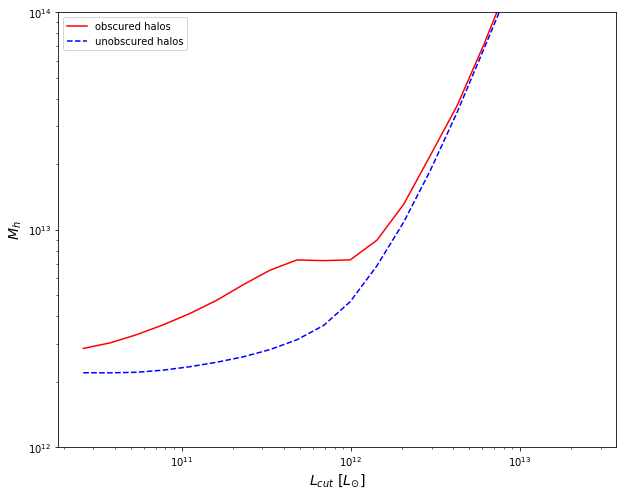

In [98]:
plt.figure(figsize = (10,8))
plt.loglog(Lcutrange, obschalomed, 'r', label = 'obscured halos')
plt.loglog(Lcutrange, unobschalomed, 'b--', label = 'unobscured halos')
axes = plt.gca()
axes.set_ylim([1e12, 1e14])
#plt.axvline(9e11, color = 'g')
plt.xlabel('$L_{cut} \ [L_{\odot}]$', fontsize = 14)
plt.ylabel('$M_{h}$', fontsize = 14)
plt.legend()

## This plot does not look like Mike's- Plot distribution for a bunch of different $L_{cut}$ values

In [99]:
testLcut = [5.e11, 9.e11, 7.e12]

obscured weighted median: 7.31233447135e+12
unobscured weighted median: 3.16488727319e+12
obscured weighted median: 7.12783020187e+12
unobscured weighted median: 4.29985823702e+12
obscured weighted median: 9.5088840476e+13
unobscured weighted median: 8.70756453926e+13


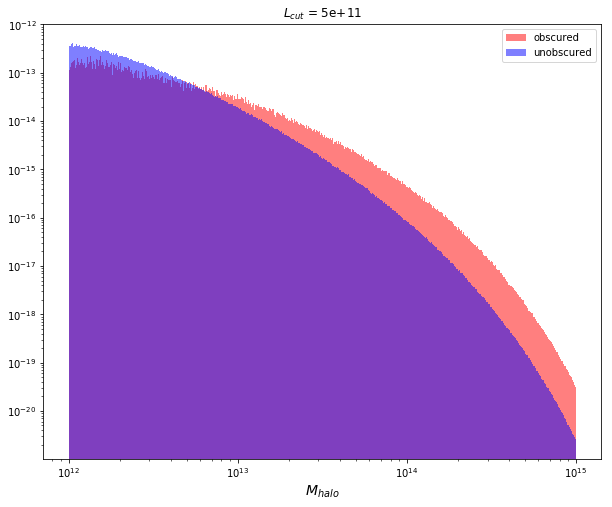

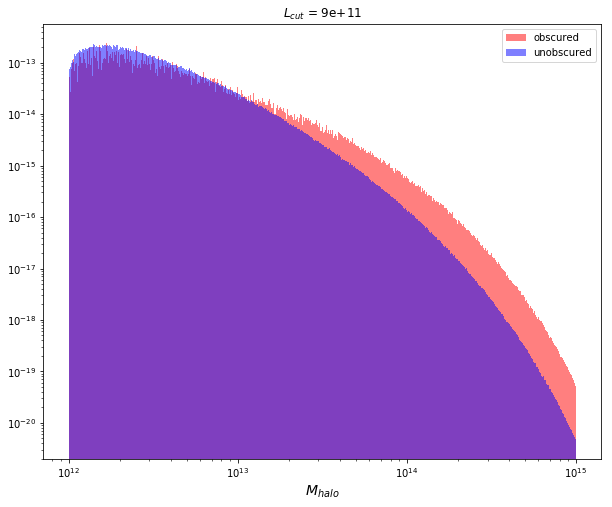

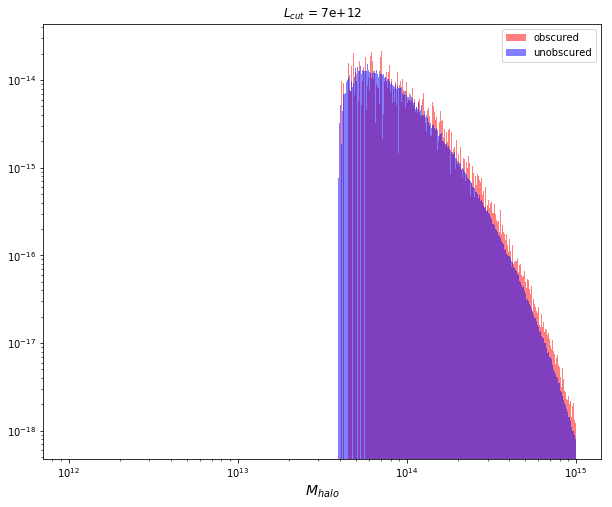

In [100]:
for lcut in testLcut:
    
    largelumFlag = largeluminosities > lcut
    largelumFlagobs = largelumFlag[largeobscuredFlag]
    largelumFlagunobs = largelumFlag[largeunobscuredFlag]
    
    nlargeobscuredHalos = largeobscuredHalos[largelumFlagobs] 
    nlargeunobscuredHalo = largeunobscuredHalos[largelumFlagunobs]
    
    
    print 'obscured weighted median: ' + str(ws.weighted_median(largeobscuredHalos[largelumFlagobs], weights = largeWeightsi[largeobscuredFlag][largelumFlagobs]))
    print 'unobscured weighted median: ' + str(ws.weighted_median(largeunobscuredHalos[largelumFlagunobs], weights = largeWeightsi[largeunobscuredFlag][largelumFlagunobs]))

    
    plt.figure(figsize = (10,8))
    plt.hist(nlargeobscuredHalos, weights = largeWeightsi[largeobscuredFlag][largelumFlagobs], bins = np.logspace(12, 15, 1000), range = (min(mhalos), max(largeHMSrange)), label = 'obscured', color = 'red', alpha = 0.5, normed = True)[2]
    plt.hist(nlargeunobscuredHalo, weights = largeWeightsi[largeunobscuredFlag][largelumFlagunobs], bins = np.logspace(12, 15, 1000), range = (min(mhalos), max(largeHMSrange)), color = 'blue', label = 'unobscured', alpha = 0.5, normed = True)[2]
    axes = plt.gca()
    axes.set_xscale("log")
    axes.set_yscale("log")
    plt.legend()
    plt.xlabel('$M_{halo}$', fontsize = 14)
    plt.title('$L_{cut}$ = ' + str(lcut))

    
    
    
    

# Plot $f_{obsc}$ as a function of $L_{cut}$

In [101]:
Lcutrange = np.logspace(np.log10(10**(44)/ 3.826e33), np.log10(10**(47)/ 3.826e33), 20)
fobsc = np.zeros(20)
index = 0

In [102]:
for lcut in Lcutrange:
    
    largelumFlag = largeluminosities > lcut
    largelumFlagobs = largelumFlag[largeobscuredFlag]
    largelumFlagunobs = largelumFlag[largeunobscuredFlag]
    
    nlargeobscuredHalos = largeobscuredHalos[largelumFlagobs] 
    nlargeunobscuredHalo = largeunobscuredHalos[largelumFlagunobs] 
    
    fobsc[index] = np.float(len(nlargeobscuredHalos))/(np.float(len(nlargeobscuredHalos) + len(nlargeunobscuredHalo)))
    
    index = index + 1

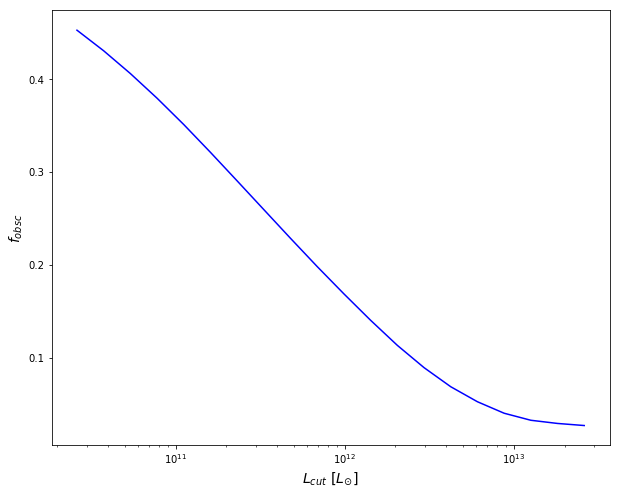

In [103]:
plt.figure(figsize = (10,8))
plt.semilogx(Lcutrange, fobsc, 'b', label = 'obscured halos')
#plt.semilogx(Lcutrange, fobsc, 'ro', label = 'obscured halos')
axes = plt.gca()
#axes.set_ylim([1e12, 1e14])
plt.xlabel('$L_{cut} \ [L_{\odot}]$', fontsize = 14)
plt.ylabel('$f_{obsc}$', fontsize = 14)